In [2]:
import pandas as pd
import numpy as np
from sklearn import datasets

In [9]:
digits=datasets.load_digits()

In [10]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

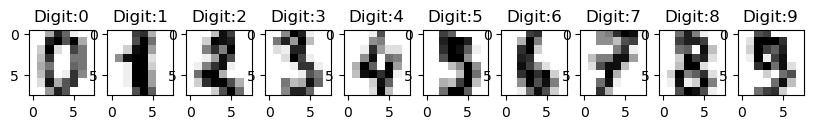

In [11]:
plt.figure(figsize=(10,4))
for index,(image,label) in enumerate(zip(digits.images[:10],digits.target[:10])):
    plt.subplot(1,10,index+1)
    plt.imshow(image,cmap=plt.cm.gray_r,interpolation='nearest')
    plt.title(f'Digit:{label}')
plt.show

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
n_samples=len(digits.images)
X=digits.images.reshape((n_samples,-1))
y=digits.target

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=12)

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [17]:
from sklearn.svm import SVC

In [18]:
svm_classifier=SVC(kernel='rbf',gamma=0.001,C=1.0)
svm_classifier.fit(X_train,y_train)


SVC(gamma=0.001)

In [19]:
svm_classifier.score(X_test,y_test)

0.9333333333333333

In [20]:
y_pred=svm_classifier.predict(X_test)

In [21]:
from sklearn.metrics import classification_report

In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        37
           1       0.80      1.00      0.89        32
           2       1.00      0.92      0.96        38
           3       0.98      0.95      0.96        43
           4       1.00      0.92      0.96        39
           5       0.97      0.94      0.96        34
           6       1.00      0.97      0.98        29
           7       0.89      0.98      0.93        42
           8       0.84      0.84      0.84        32
           9       0.90      0.79      0.84        34

    accuracy                           0.93       360
   macro avg       0.94      0.93      0.93       360
weighted avg       0.94      0.93      0.93       360



In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns 

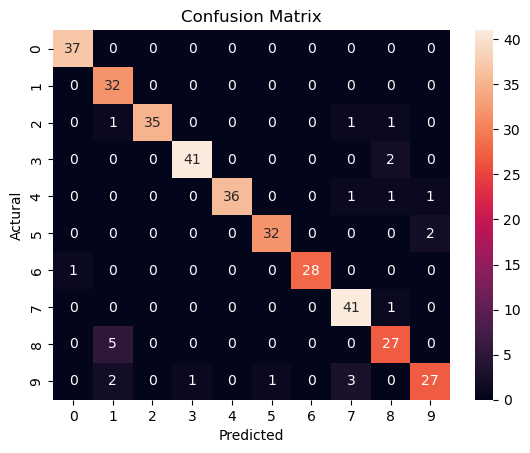

In [27]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d",xticklabels=digits.target_names,yticklabels=digits.target_names)
plt.ylabel("Actural")
plt.xlabel("Predicted")
plt.title('Confusion Matrix')
plt.show()


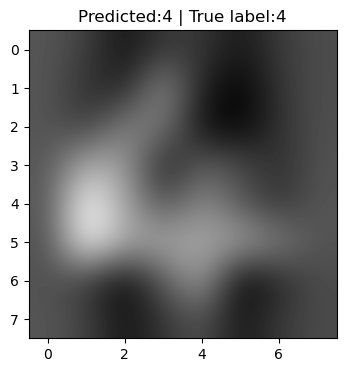

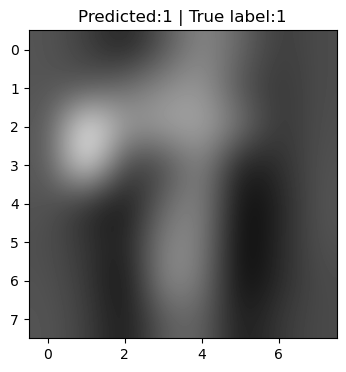

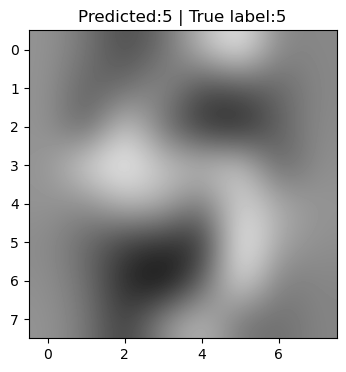

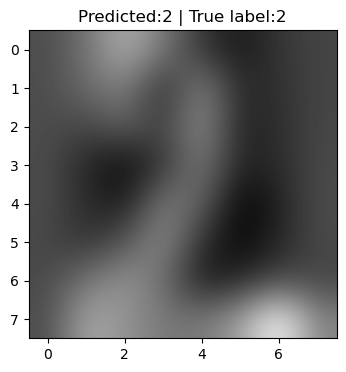

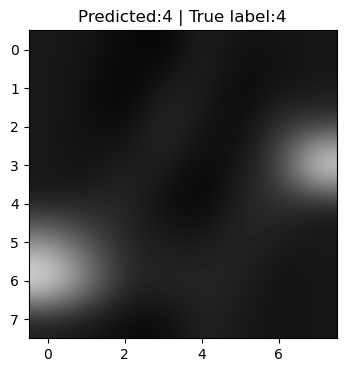

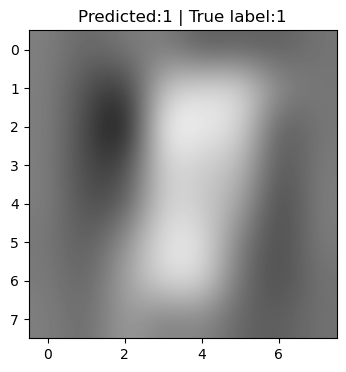

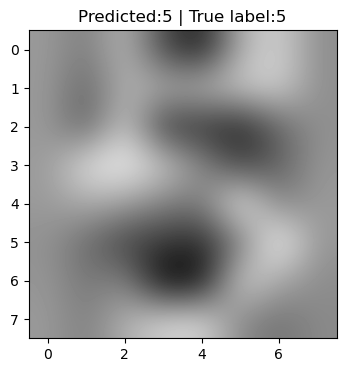

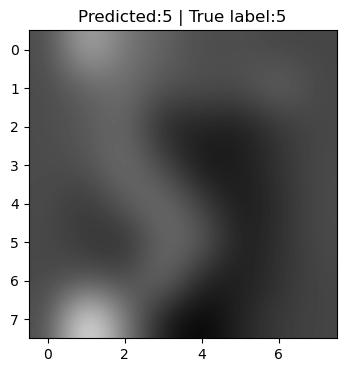

In [25]:
for i in np.random.randint(0,len(X_test),8):
    two_d=np.reshape(X_test[i],(8,8))
    plt.figure(figsize=(4, 4))
    plt.title(f'Predicted:{y_pred[i]} | True label:{y_test[i]}')
    plt.imshow(two_d,cmap='gray',interpolation='bicubic')
    plt.show()